Support vector classifier implementation

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
# lets create synthetic data points
from sklearn.datasets import make_classification

In [39]:
X,y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=2, n_redundant=0)

In [18]:
X

array([[-1.29251794,  1.45057619],
       [ 0.48414239, -1.44471484],
       [-0.93131075,  0.87908488],
       ...,
       [ 1.60090906, -0.49611802],
       [ 0.5028076 , -1.38426921],
       [-0.75012878,  0.49299126]], shape=(1000, 2))

In [19]:
y

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,

In [20]:
pd.DataFrame(X)[0]

0     -1.292518
1      0.484142
2     -0.931311
3     -1.129803
4     -0.811771
         ...   
995   -0.775981
996   -1.081304
997    1.600909
998    0.502808
999   -0.750129
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

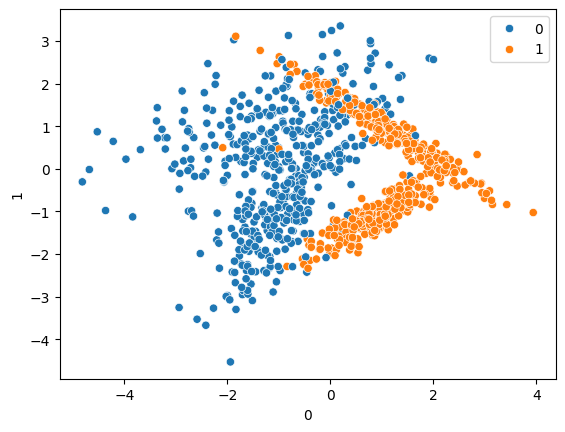

In [40]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [41]:
# Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=10)

In [42]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')

In [43]:
svc.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [44]:
y_pred = svc.predict(X_test)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       130
           1       0.87      0.86      0.87       120

    accuracy                           0.87       250
   macro avg       0.87      0.87      0.87       250
weighted avg       0.87      0.87      0.87       250

[[115  15]
 [ 17 103]]


In [47]:
rbf = SVC(kernel='rbf')

In [48]:
rbf.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [53]:
y_pred1 = rbf.predict(X_test)

In [54]:
print(classification_report(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       130
           1       0.88      0.97      0.92       120

    accuracy                           0.92       250
   macro avg       0.93      0.93      0.92       250
weighted avg       0.93      0.92      0.92       250

[[114  16]
 [  3 117]]


In [59]:
polynomial = SVC(kernel='poly')
polynomial.fit(X_train, y_train)
y_pred2 = polynomial.predict(X_test)
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))


              precision    recall  f1-score   support

           0       0.88      0.92      0.90       130
           1       0.91      0.86      0.88       120

    accuracy                           0.89       250
   macro avg       0.89      0.89      0.89       250
weighted avg       0.89      0.89      0.89       250

[[120  10]
 [ 17 103]]


In [60]:
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
y_pred3 = sigmoid.predict(X_test)
print(classification_report(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))


              precision    recall  f1-score   support

           0       0.81      0.77      0.79       130
           1       0.76      0.80      0.78       120

    accuracy                           0.78       250
   macro avg       0.78      0.78      0.78       250
weighted avg       0.79      0.78      0.78       250

[[100  30]
 [ 24  96]]


rbf kernel giving good accuracy in this case

## Hyperparameter tuning with SVC

In [61]:
## Hyperparameter tunning
from sklearn.model_selection import GridSearchCV

# difing parameter range 
param_grid = {
    'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
    'kernel': ['rbf', 'linear', 'polynomial']
}


In [62]:
grid = GridSearchCV(SVC(), param_grid = param_grid, refit=True, cv = 5, verbose=3)

In [63]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.920 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.887 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.900 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.873 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.880 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=1, kernel=polynomi

d:\Krish ML courses\ML Course\venvMLcourse\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
125 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Krish ML courses\ML Course\venvMLcourse\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Krish ML courses\ML Course\venvMLcourse\lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "d:\Krish ML courses\ML Course\venvMLcourse\lib\site-packages\sklearn\base.py", line 471, in _validate_params
    validate

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf', 'linear', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [64]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [65]:
y_pred4 = grid.predict(X_test)
print(classification_report(y_test, y_pred4))
print(confusion_matrix(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       130
           1       0.92      0.97      0.95       120

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250

[[120  10]
 [  3 117]]
